In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
df = pd.read_excel(r'D:\Superstore.xlsx')

In [221]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment Section,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3700,7387,IT-2015-2600640,2015-10-21,2015-10-28,Standard Class,SF-20065,Sandra Flanagan,Consumer,Berlin,Berlin,Germany,Central,OFF-BI-10000972,Office Supplies,Binders,"Acco 3-Hole Punch, Economy",27.108,1,0.1,2.688
8015,7826,ES-2018-2637929,2018-11-15,2018-11-19,Standard Class,DF-13135,David Flashing,Consumer,Valencia,Valenciana,Spain,South,OFF-SU-10000782,Office Supplies,Supplies,"Fiskars Shears, Serrated",133.020,3,0.0,38.520


In [222]:
df.shape

(10000, 20)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           10000 non-null  int64         
 1   Order ID         10000 non-null  object        
 2   Order Date       10000 non-null  datetime64[ns]
 3   Ship Date        10000 non-null  datetime64[ns]
 4   Ship Mode        10000 non-null  object        
 5   Customer ID      10000 non-null  object        
 6   Customer Name    10000 non-null  object        
 7   Segment Section  10000 non-null  object        
 8   City             10000 non-null  object        
 9   State            10000 non-null  object        
 10  Country          10000 non-null  object        
 11  Region           10000 non-null  object        
 12  Product ID       10000 non-null  object        
 13  Category         10000 non-null  object        
 14  Sub-Category     9999 non-null   object

In [224]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       1
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [225]:
mode_value=df['Sub-Category'].mode()
print(mode_value)


0    Art
Name: Sub-Category, dtype: object


In [226]:
df['Sub-Category'].fillna('Art',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15808\4118043401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub-Category'].fillna('Art',inplace=True)


In [227]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [228]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    6054
Second Class      1976
First Class       1454
Same Day           516
Name: count, dtype: int64

In [229]:
x= df['Ship Mode'].value_counts().index
y=df['Ship Mode'].value_counts().values

print("x = ",x)

print("y = ",y)

x =  Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')
y =  [6054 1976 1454  516]


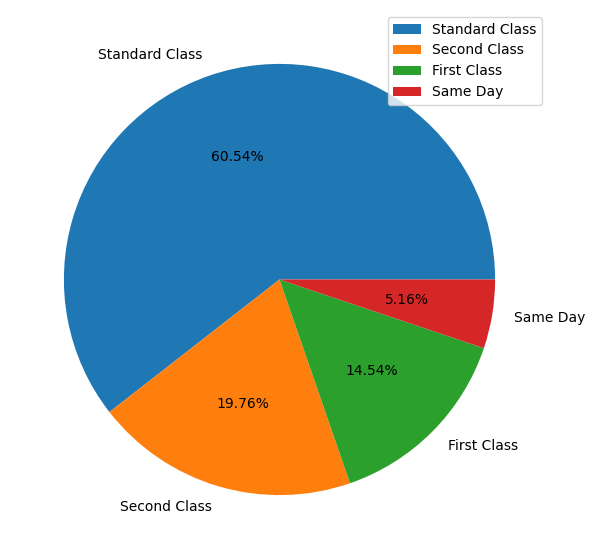

In [230]:
plt.figure(figsize=(9,7))
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.legend(loc=1)
plt.show()

# bivariant analysis


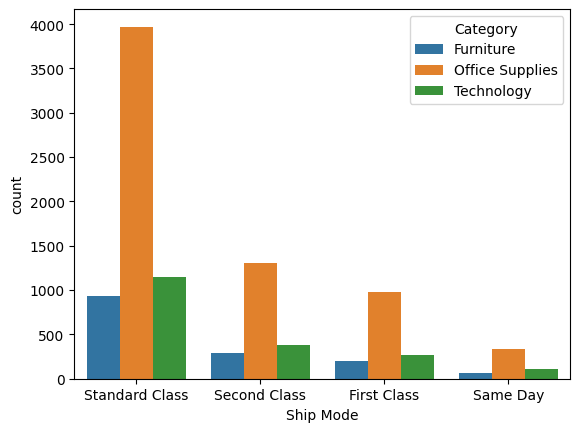

In [231]:

sns.countplot(x=df['Ship Mode'],data=df,hue=df['Category'])
plt.show()

In [232]:
df = df.rename(columns={"Segment Section":"Customer Segment"})

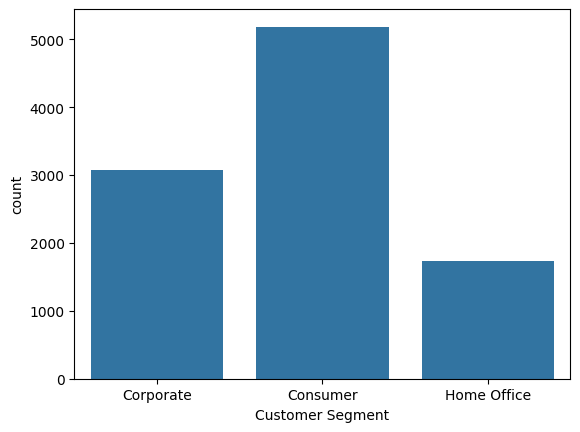

In [233]:
df['Customer Segment'].value_counts()
sns.countplot(x=df['Customer Segment'],data=df)
plt.show()

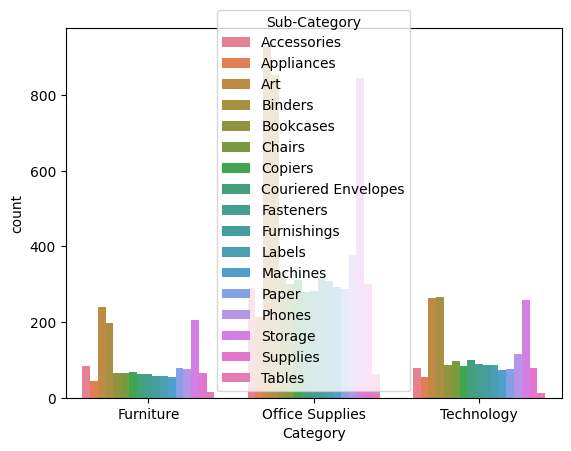

In [234]:
sns.countplot(x=data['Category'],data=df,hue=data['Sub-Category'])
plt.show()

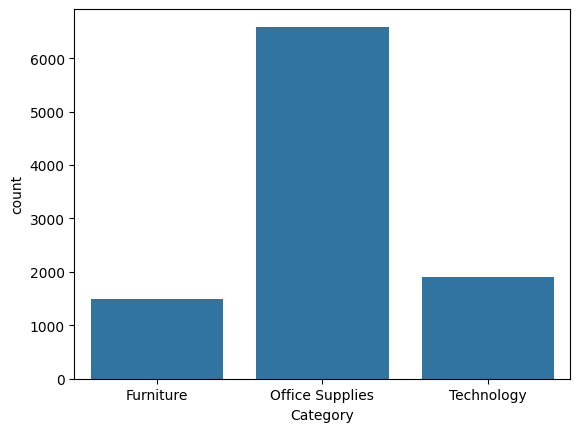

In [235]:
sns.countplot(x=df['Category'],data=df[df['Category']=='Furniture'])
plt.show()

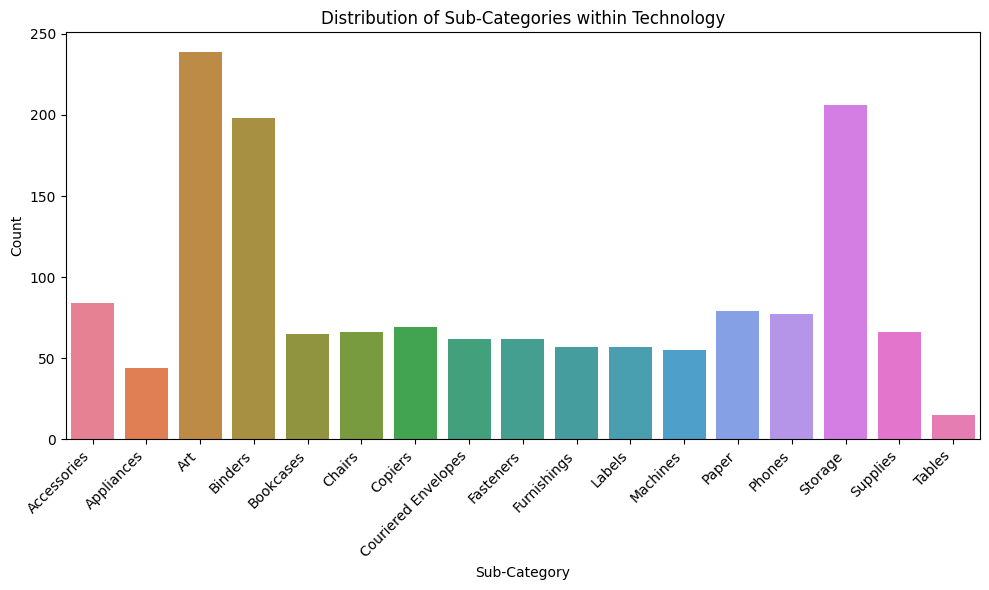

In [236]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visualization
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Furniture'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Technology')  # Add a title
plt.xlabel('Sub-Category')  # Explicitly label the x-axis
plt.ylabel('Count')  # Explicitly label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [237]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [238]:
df['order year']=df['Order Date'].dt.year

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            10000 non-null  int64         
 1   Order ID          10000 non-null  object        
 2   Order Date        10000 non-null  datetime64[ns]
 3   Ship Date         10000 non-null  datetime64[ns]
 4   Ship Mode         10000 non-null  object        
 5   Customer ID       10000 non-null  object        
 6   Customer Name     10000 non-null  object        
 7   Customer Segment  10000 non-null  object        
 8   City              10000 non-null  object        
 9   State             10000 non-null  object        
 10  Country           10000 non-null  object        
 11  Region            10000 non-null  object        
 12  Product ID        10000 non-null  object        
 13  Category          10000 non-null  object        
 14  Sub-Category      10000

In [240]:
df['order year'].value_counts()

order year
2018    3528
2017    2577
2016    2242
2015    1653
Name: count, dtype: int64

<Axes: xlabel='order year', ylabel='count'>

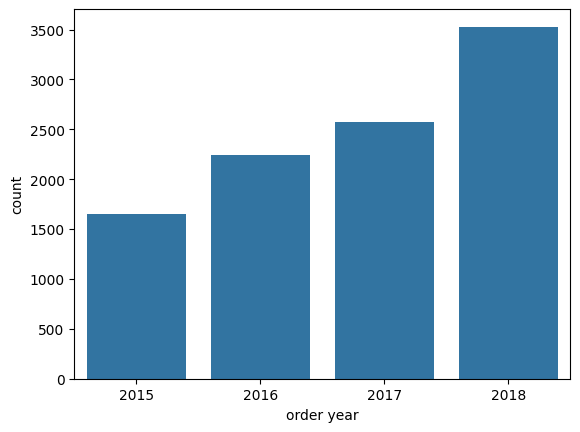

In [241]:
sns.countplot(x=df['order year'],data=df)

<Axes: xlabel='Category', ylabel='Profit'>

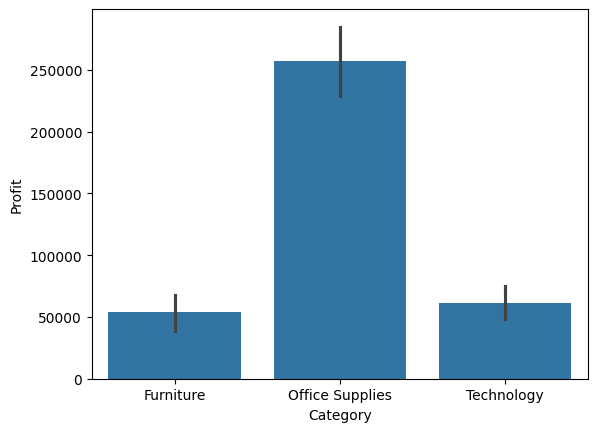

In [242]:
# sns.barplot(x=df['Category'],y=['Profit'],data=df,estimator='sum')
# plt.show()
sns.barplot(x=df['Category'],y=df['Profit'],data=df,estimator='sum')

In [243]:
df['State'].value_counts()[:5]

State
England                       1499
Ile-de-France                  981
North Rhine-Westphalia         719
Provence-Alpes-Côte d'Azur     390
Auvergne-Rhône-Alpes           256
Name: count, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            10000 non-null  int64         
 1   Order ID          10000 non-null  object        
 2   Order Date        10000 non-null  datetime64[ns]
 3   Ship Date         10000 non-null  datetime64[ns]
 4   Ship Mode         10000 non-null  object        
 5   Customer ID       10000 non-null  object        
 6   Customer Name     10000 non-null  object        
 7   Customer Segment  10000 non-null  object        
 8   City              10000 non-null  object        
 9   State             10000 non-null  object        
 10  Country           10000 non-null  object        
 11  Region            10000 non-null  object        
 12  Product ID        10000 non-null  object        
 13  Category          10000 non-null  object        
 14  Sub-Category      10000

In [257]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df:
    df[i]=encoder.fit_transform(df[i])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer Segment,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order year
0,1,2507,953,1046,3,51,2,1,538,41,...,1,1544,0,0,1550,4823,6,0,1888,3
1,4,2507,953,1046,3,51,2,1,538,41,...,1,1540,0,0,1205,4405,2,0,4212,3
2,16,2101,639,705,3,421,435,0,915,1,...,0,1547,0,0,255,5608,5,0,1888,2
3,23,4413,1028,1126,2,450,435,2,637,68,...,2,1510,0,0,1206,630,0,0,1942,3
4,29,3182,1149,1254,3,63,49,0,459,81,...,0,1486,0,0,257,3522,4,0,3350,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9369,2060,748,823,3,143,167,0,307,96,...,1,379,2,16,1165,5912,1,0,5456,2
9996,9377,3674,274,300,3,670,672,0,724,6,...,2,351,2,16,234,5668,1,9,89,0
9997,9554,4143,608,672,3,24,44,0,572,41,...,1,353,2,16,1164,5812,1,1,5420,2
9998,9703,4175,656,722,3,452,458,0,309,79,...,0,355,2,16,243,4423,1,11,42,2


In [258]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2]


In [259]:
X.shape


(10000, 19)

In [260]:
y.shape

(10000,)

In [261]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [262]:
from sklearn.linear_model import LinearRegression
Lg=LinearRegression()
Lg.fit(x_train,y_train)

LinearRegression()

In [263]:
y_pred=Lg.predict(x_test)
y_pred

array([2492.07114548, 1727.58613237, 2970.5001303 , ..., 2679.0344402 ,
       2341.95686763, 3408.00127615], shape=(3000,))

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 872506.9097468575
R-squared: 0.5265658948637548


In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:

# Logistic Regression
logreg = LogisticRegression(max_iter=1000) #increase max_iter if it fails to converge.
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred)}")


: 

In [ ]:
# Support Vector Classifier (SVC)
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print(f"SVC Accuracy: {accuracy_score(y_test, svc_pred)}")

In [ ]:

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

In [ ]:

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")